In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [95]:
df = pd.read_csv('creditcard.csv')

In [96]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [97]:
f_df = df[df['Class']==1]
nf_df = df[df['Class']==0]

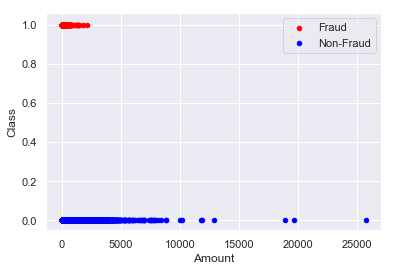

In [98]:
ax = f_df.plot.scatter('Amount','Class', color='Red', label='Fraud')
nf_df.plot.scatter('Amount','Class', color='Blue', label='Non-Fraud',ax=ax)
plt.show()

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [100]:
x = df.iloc[:,:-1]
y = df[['Class']]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

In [102]:
log_reg = LogisticRegression(C=1)

In [103]:
log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
log_reg.score(X_test,y_test)

0.9989867881183351

In [105]:
y_pred = log_reg.predict(X_test)

## Correlation of the class with other variables

In [106]:
cor = df.corr().iloc[-1].sort_values()

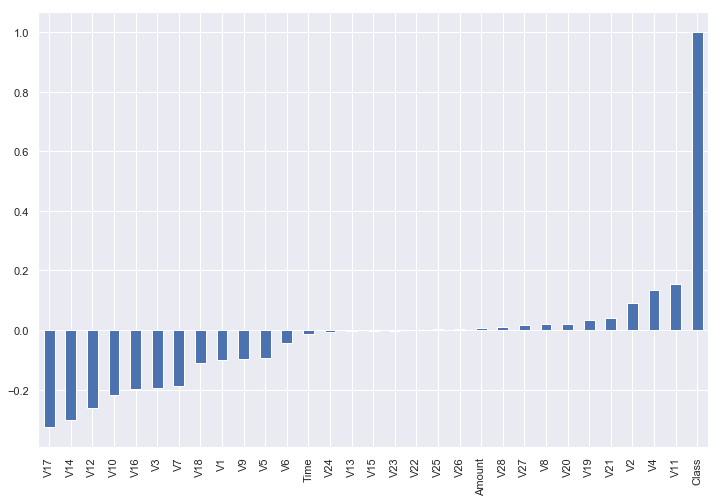

In [107]:
plt.figure(figsize=(12,8))
cor.plot.bar()
plt.show()

From the above plot we can conclude how different variables are correlated with the dependent variable `Class`